In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import os
import random
import json

In [2]:
os.chdir("/home/bartek/ETH/CS4NLP/project/free-form-VQA/code")
from vqa import VQA

In [3]:
train_imgs_path = "/home/bartek/ETH/CS4NLP/project/train2014"
val_imgs_path = "/home/bartek/ETH/CS4NLP/project/val2014"
random.seed(2137)
pathlib.Path.cwd()

PosixPath('/home/bartek/ETH/CS4NLP/project/free-form-VQA/code')

In [4]:
dataDir = "/home/bartek/ETH/CS4NLP/project/coco/PythonAPI"
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [5]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


In [6]:
img_ids = coco_caps.getImgIds()

In [7]:
coco_caps.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]

{'license': 2,
 'file_name': 'COCO_val2014_000000369791.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000369791.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-15 19:26:10',
 'flickr_url': 'http://farm8.staticflickr.com/7279/7622229942_7f0963d148_z.jpg',
 'id': 369791}

In [8]:
image_ids_subsample = random.sample(img_ids,int(0.05*len(img_ids)))

In [9]:
len(image_ids_subsample)

2025

In [10]:
i=0
annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
print(img_ids[0])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

391895
A group of people cross country skiing in forest.
A group of cross country skiers in a line going up a trail that is covered in snow.
Several people on skies travel a snowy pathway between patches of dirt.
A group of skiers traveling up a snowy slope.
several people on skis are walking single file


In [11]:
vqa = VQA(annotation_file= "../data/v2_mscoco_train2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_train2014_questions.json")
vqa_val = VQA(annotation_file= "../data/v2_mscoco_val2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_val2014_questions.json")

q_ids_train = vqa.getImgIds()
q_ids_val = vqa_val.getImgIds()
q_ids_all = q_ids_train+q_ids_val

loading VQA annotations and questions into memory...
0:00:05.640041
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:02.526874
creating index...
index created!


In [18]:
question_id = 299333
question = "What can be seen in this image?"

assert question_id in q_ids_all

annotations = []
questions = []

for i in range(len(image_ids_subsample)):
    annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
    anns = coco_caps.loadAnns(annIds)
    capt = [an["caption"] for an in anns]
    annot = {"question_type": "describe image", "multiple_choice_answer": capt, 
     "answers": capt,"image_id": image_ids_subsample[i], "answer_type": "caption",
     "question_id": question_id}
    annotations.append(annot)
    q_item = {"question_id" : question_id, "image_id": image_ids_subsample[i], "question" : question}
    questions.append(q_item)


In [19]:
# annotations

In [20]:
with open("annotations_testing.json", "w") as f:
    json.dump({"annotations": annotations}, f )
    
with open("questions_testing.json", "w") as q:
    json.dump({"questions": questions}, q)


## VQA tool

In [46]:
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5))
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']

Question: What color are the lady's pants?
Answer 1: gray
Answer 2: gray
Answer 3: gray
Answer 4: gray
Answer 5: black
Answer 6: gray
Answer 7: blacks
Answer 8: black
Answer 9: black
Answer 10: one is grey and other is black


In [47]:
vqa.loadQA(annIds)

[{'answer_type': 'other',
  'multiple_choice_answer': 'hilton',
  'answers': [{'answer': 'budget hotel',
    'answer_confidence': 'maybe',
    'answer_id': 1},
   {'answer': 'marriott', 'answer_confidence': 'no', 'answer_id': 2},
   {'answer': 'hilton', 'answer_confidence': 'no', 'answer_id': 3},
   {'answer': 'hilton', 'answer_confidence': 'maybe', 'answer_id': 4},
   {'answer': 'omni', 'answer_confidence': 'no', 'answer_id': 5},
   {'answer': 'no', 'answer_confidence': 'no', 'answer_id': 6},
   {'answer': "don't know", 'answer_confidence': 'no', 'answer_id': 7},
   {'answer': 'radisson', 'answer_confidence': 'no', 'answer_id': 8},
   {'answer': 'marriott', 'answer_confidence': 'maybe', 'answer_id': 9},
   {'answer': 'unknown', 'answer_confidence': 'maybe', 'answer_id': 10}],
  'image_id': 276694,
  'question_type': 'what is the name',
  'question_id': 276694000},
 {'question_type': 'what time',
  'multiple_choice_answer': 'morning',
  'answers': [{'answer': 'morning',
    'answer_con

In [48]:
imgId

252576

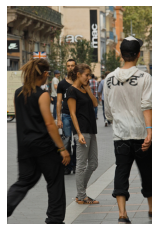

In [49]:
I = io.imread(train_imgs_path + "/COCO_train2014_"+str(imgId).zfill(12)+".jpg")
plt.imshow(I)
plt.axis('off')
plt.show()

In [50]:
question = "What can be seen in this image?"

"annotations": [{"question_type": "describe image", "multiple_choice_answer": "down", "answers": [], "image_id": 262148, "answer_type": "caption", "question_id": question_id}]
# annotation{
# "question_id" : int,
# "image_id" : int,
# "question_type" : str,
# "answer_type" : str,
# "answers" : [answer],
# "multiple_choice_answer" : str
# }


{}